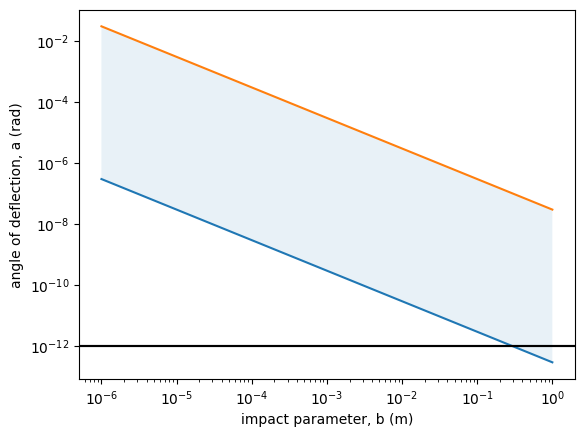

In [34]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11
M = np.linspace(1e14, 1e19, 2)
b = np.linspace(0, 1, 1000000)
# print(b)
def angle(M, b, c = 299793458, g = G):
    return 4 * g * M / (np.power(c, 2) * b)
a = []
for m in M:
    a.append(angle(m, b[1:]))
    plt.xlabel("impact parameter, b (m)")
    plt.ylabel("angle of deflection, a (rad)")
    plt.axhline(1e-12, c = "black")
    plt.loglog(b[1:], a[-1])
plt.fill_between(b[1:], a[0], a[1], alpha = 0.1)
plt.show()